# US Radio Range Visualizer in Python

by Sebastian Shirk <br>\
Last updated: May 15, 2024

This notebook is a Python implementation of a US Radio Range Visualizer.<br>\
The goal of this notebook is to visualize the range of radio stations across the United States.<br>\
Note that this is not an API, but rather a visualization tool of a dataset that we can download programmatically.<br>\
The FCC notes that use of the FCC FM service contour data is at the users' own risk and no restrictions are set on the use of this data. Please see their website for more information: https://www.fcc.gov/media/radio/fm-service-contour-data-points

**Inspiration for this Tutorial:** https://erdavis.com/2020/01/04/visualizing-the-geography-of-fm-radio/<br>\
**FCC Service Contour Data Points:**  https://www.fcc.gov/media/radio/fm-service-contour-data-points<br>\
**FCC FM Query:**  https://www.fcc.gov/media/radio/fm-query

## Import Libraries

This tutorial will use the following libraries:

In [1]:
import plotly.graph_objects as go
from shapely.geometry import Point, Polygon

## 1. Gathering and Reading the Data

The FCC provides a list of FM service contour data points for each radio station. We will use this data to visualize the radio range of each station.<br>\
Run the following code to download the data:

In [ ]:
#download file via curl
import subprocess

url = "https://transition.fcc.gov/Bureaus/MB/Databases/fm_service_contour_data/FM_service_contour_current.zip"

def download_file(url):
    subprocess.run(["curl", "-O", url])

def unzip_file():
    #unzip file
    subprocess.run(["unzip", "FM_service_contour_current.zip"])
    
download_file(url)
unzip_file()

We can see that the data is formatted as so: <br>\
`application_id|service|lms_application_id|dts_site_number|transmitter_site|0|1|2|3|4|...|355|356|357|358|359|^|`<br>\
Right now we are only interested in the 360 azimuth data points.<br>\
To parse this data, we will use the following code:

In [ ]:
# Read the data from the file
with open("FM_service_contour_current.txt", "r") as f:
    f.readline()
    for line in f:
        x_data = []
        y_data = []
        # Split the line by the pipe character and get the data
        data = line.split("|")[4:-2]
        # Get the latitude and longitude data and convert them to floats
        lat_data, lon_data = zip(*[(float(data_point.split(",")[0]), float(data_point.split(",")[-1])) for data_point in data])
        # Iterate through the lat and lon data and append it to the x and y data lists
        for lat, lon in zip(lat_data[1:], lon_data[1:]):
            x_data.append(lat)
            y_data.append(lon)
        # Uncomment the following line when we get the plot_trace function
        # plot_trace(x_data, y_data, fig)
        x_data.append(None)
        y_data.append(None)

This parses the data to exclude the first five entries and then reads the azimuthal coordinates into a list, splitting the data by latitude and longitude. Then we append a None value to the end of the list to close the polygon.

## 2. Plotting the Data

Now that we have the data, we can plot the radio range of each station. We will use the `plotly` library to create a map of the radio ranges. We will edit our code to include the following:

In [2]:
import plotly.graph_objects as go
fig = go.Figure()

# Plots our polygons
def plot_trace(lat_data, lon_data, fig):
    fig.add_trace(go.Scattergeo(
        # Sets the coordinates via the lat and lon data
        locationmode='USA-states',
        lon=lon_data,
        lat=lat_data,
        # Sets the mode to lines and fills in the area
        mode='lines',
        fill='toself',
        fillcolor="rgba(158,27,50,0.05)",
        line=dict(width=0.5, color="rgba(119,36,50,0.8)"),
        hoverinfo='skip'
    ))

# Read the data from the file
with open("FM_service_contour_current.txt", "r") as f:
    f.readline()
    for line in f:
        x_data = []
        y_data = []
        # Split the line by the pipe character and get the data
        data = line.split("|")[4:-2]
        # Get the latitude and longitude data and convert it to floats
        lat_data, lon_data = zip(*[(float(data_point.split(",")[0]), float(data_point.split(",")[-1])) for data_point in data])
        # Iterate through the lat and lon data and append it to the x and y data lists
        for lat, lon in zip(lat_data[1:], lon_data[1:]):
            x_data.append(lat)
            y_data.append(lon)
        # Plot the trace
        plot_trace(x_data, y_data, fig)
        # Append None to the x and y data lists to separate the polygons
        x_data.append(None)
        y_data.append(None)

# Set the layout of the plot
fig.update_layout(
    title_text='Radio Range Visualization - United States',
    showlegend=False,
    geo=dict(
        scope='usa',
        landcolor='rgb(217, 217, 217)',
        projection_type='albers usa',
    )
)

# Save to HTML
fig.write_html("radio_range_visualization.html")

This will create a plot of the United States with the radio ranges of each station overlaid on the map.<br>\
We achieve this by calling `plot_trace` for each set of coordinates in the data which creates a polygon based on those coordinates.<br>\
The update layout function sets the title of the map and the map's projection.<br>\
Then finally, we write the plot to an HTML file. You can view this file in any browser. You can also use `fig.show()` to display the plot, but it may look worse than the HTML file.<br>\
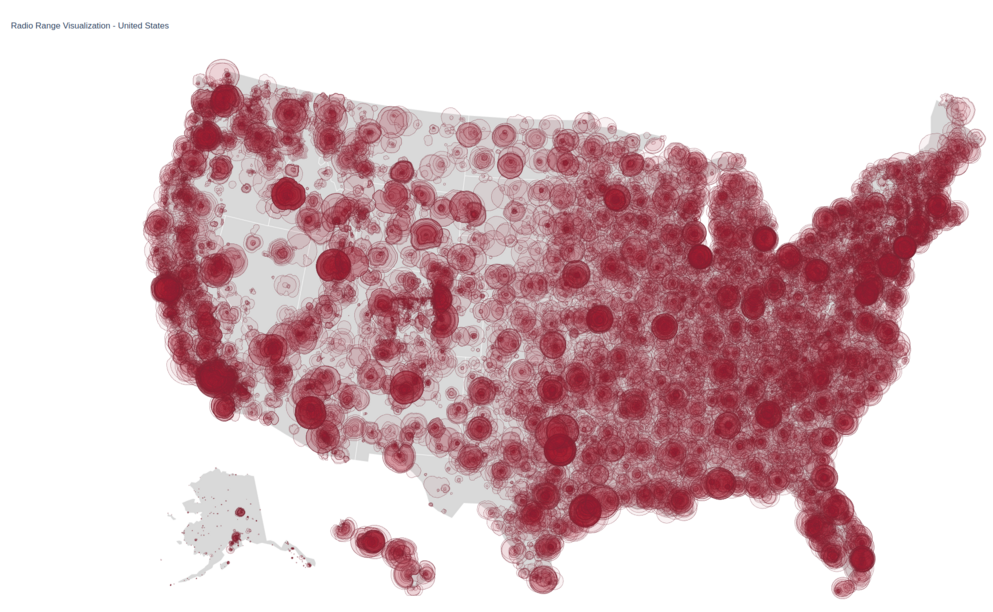

## Selecting Specific States and/or Stations

We can now filter the data to only show specific states by drawing a bounding box around the desired area. We can get this polygon by using any <a href="https://apps.nationalmap.gov/viewer/">online map</a> to find coordinates. We can also filter the data to only show specific stations by reading in the lms_applications_id from the dataset and filtering the data based on that value.

### Filtering by State
Alabama example:

In [5]:
import plotly.graph_objects as go
from shapely.geometry import Point, Polygon
fig = go.Figure()

def plot_trace(lat_data, lon_data, fig):
    fig.add_trace(go.Scattergeo(
        # Sets the coordinates via the lat and lon data
        locationmode='USA-states',
        lon=lon_data,
        lat=lat_data,
        # Sets the mode to lines and fills in the area
        mode='lines',
        fill='toself',
        fillcolor="rgba(158,27,50,0.05)",
        line=dict(width=0.5, color="rgba(119,36,50,0.8)"),
        hoverinfo='skip'
    ))

# Define the polygon for Alabama
polygon_points = [
    (35.0041, -88.1955), (34.9918, -85.6068), (32.8404, -85.1756),
    (32.2593, -84.8927), (31.9906, -85.091), (31.7091, -85.0026),
    (31.5200, -85.1358), (31.3384, -85.0836), (31.2093, -85.107),
    (31.0023, -84.9944), (30.9953, -87.6009), (30.9423, -87.5926),
    (30.8539, -87.6256), (30.6745, -87.4072), (30.4404, -87.3688),
    (30.1463, -87.5240), (30.1546, -88.3864), (31.8939, -88.4743),
    (34.8938, -88.1021), (35.0041, -88.1955)
]
alabama_polygon = Polygon(polygon_points)

# Read the data from the file
with open("FM_service_contour_current.txt", "r") as f:
    f.readline()
    for line in f:
        x_data = []
        y_data = []
        # Split the line by the pipe character and get the data
        data = line.split("|")[4:-2]
        # Get the latitude and longitude data and convert it to floats
        lat_data, lon_data = zip(*[(float(data_point.split(",")[0]), float(data_point.split(",")[-1])) for data_point in data])
        # Check if the first point(which is the center point) is in the Alabama polygon
        point = Point(lat_data[0], lon_data[0])
        # If it is not in the polygon, skip the polygon
        if not alabama_polygon.contains(point):
            continue
        # Iterate through the lat and lon data and append it to the x and y data lists
        for lat, lon in zip(lat_data[1:], lon_data[1:]):
            x_data.append(lat)
            y_data.append(lon)
        # Plot the trace
        plot_trace(x_data, y_data, fig)
        # Append None to the x and y data lists to separate the polygons
        x_data.append(None)
        y_data.append(None)

# Plot the Alabama polygon to help visualize the borders of the state
lat_data, lon_data = zip(*polygon_points)
fig.add_trace(go.Scattergeo(
    locationmode='USA-states',
    lon=lon_data,
    lat=lat_data,
    mode='lines',
    line=dict(width=0.5, color="rgba(255,255,255,1)"),
    hoverinfo='skip'
))

# Set the layout of the plot
fig.update_layout(
    title_text='Radio Range Visualization - Alabama',
    showlegend=False,
    geo=dict(
        scope='usa',
        landcolor='rgb(217, 217, 217)',
        projection_type='albers usa',
        center=dict(lat=32.456671, lon=-86.791130),  # Centered on Alabama
        projection_scale=5,
    )
)

# Save to HTML
fig.write_html("radio_range_visualization_alabama.html")

This will filter the data to only show stations in Alabama. You can change the bounding box to any state you desire.<br>\
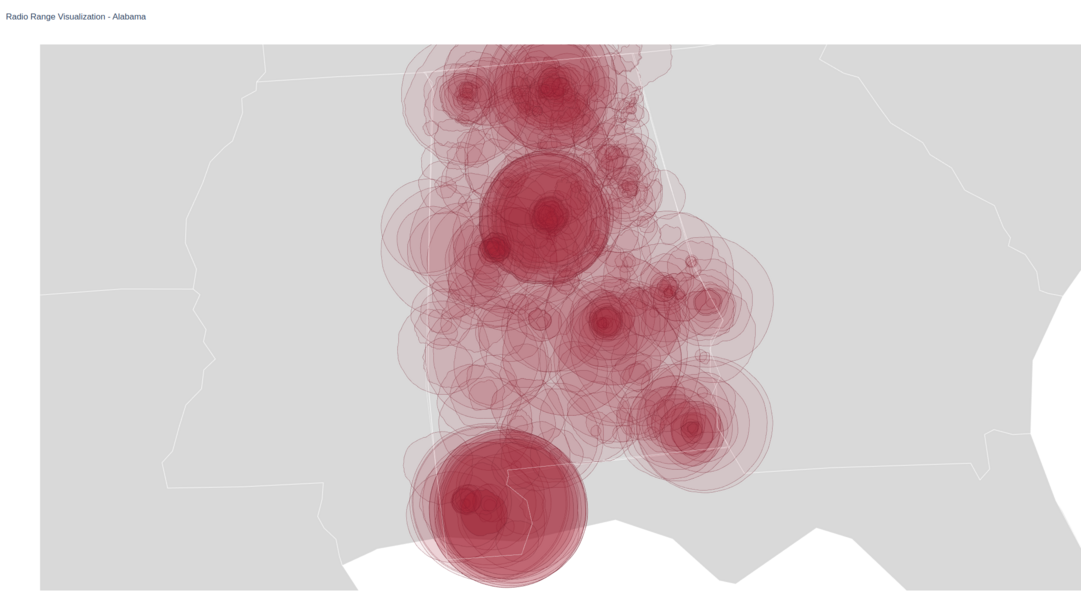

### Filtering by Station


We will use the FCC FM Query to find the lms_applications_id for the station we want to visualize. For this example, we will use the station WJOX, 94.5 Birmingham in Alabama.<br>\
Go to the <a href="https://www.fcc.gov/media/radio/fm-query">FCC FM Query</a> page and search for the station you want to visualize.<br>\
To do this, look up and use whatever your stations call sign is. There are plenty of stations to choose from if you don't want to specify by call sign but would rather sort by state or city.<br>\
For this example, we will use the call sign WMJJ.<br>\
Filter the data by `Service: Full Service FM (FM)`<br>\
We will click on the `Results to Next Page/Tab` button to query the data.<br>\
The piece of data we want here is the `LMS Application ID: `<br>\
In this case the ID is `08e9adfbeb7e4e4a9743c1b6063ebeb7`<br>\
We can now use this ID to filter the data to only show the station WMJJ in Alabama or highlight it on the radio map.

##### Only show the one station:

In [8]:
import plotly.graph_objects as go
from shapely.geometry import Point, Polygon
fig = go.Figure()

def plot_trace(lat_data, lon_data, fig):
    fig.add_trace(go.Scattergeo(
        # Sets the coordinates via the lat and lon data
        locationmode='USA-states',
        lon=lon_data,
        lat=lat_data,
        # Sets the mode to lines and fills in the area
        mode='lines',
        fill='toself',
        fillcolor="rgba(158,27,50,0.05)",
        line=dict(width=0.5, color="rgba(119,36,50,0.8)"),
        hoverinfo='skip'
    ))

# Define the polygon for Alabama
polygon_points = [
    (35.0041, -88.1955), (34.9918, -85.6068), (32.8404, -85.1756),
    (32.2593, -84.8927), (31.9906, -85.091), (31.7091, -85.0026),
    (31.5200, -85.1358), (31.3384, -85.0836), (31.2093, -85.107),
    (31.0023, -84.9944), (30.9953, -87.6009), (30.9423, -87.5926),
    (30.8539, -87.6256), (30.6745, -87.4072), (30.4404, -87.3688),
    (30.1463, -87.5240), (30.1546, -88.3864), (31.8939, -88.4743),
    (34.8938, -88.1021), (35.0041, -88.1955)
]
alabama_polygon = Polygon(polygon_points)

# Read the data from the file
with open("FM_service_contour_current.txt", "r") as f:
    f.readline()
    for line in f:
        x_data = []
        y_data = []
        # Get the lms application ID
        lms_application_id = str(line.split("|")[2].strip())
        # Split the line by the pipe character and get the data
        data = line.split("|")[4:-2]
        # Get the latitude and longitude data and convert it to floats
        lat_data, lon_data = zip(*[(float(data_point.split(",")[0]), float(data_point.split(",")[-1])) for data_point in data])
        # Check if the first point(which is the center point) is in the Alabama polygon
        point = Point(lat_data[0], lon_data[0])
        # If it is not in the polygon, skip the polygon
        if not alabama_polygon.contains(point):
            continue
        # Iterate through the lat and lon data and append it to the x and y data lists
        for lat, lon in zip(lat_data[1:], lon_data[1:]):
            x_data.append(lat)
            y_data.append(lon)
        # Plot the trace by checking the lms application ID
        if lms_application_id == "f4bd9f4326e443c99eb2c1b6063ebeb7":
            plot_trace(x_data, y_data, fig)
        # Append None to the x and y data lists to separate the polygons
        x_data.append(None)
        y_data.append(None)

# Plot the Alabama polygon to help visualize the borders of the state
lat_data, lon_data = zip(*polygon_points)
fig.add_trace(go.Scattergeo(
    locationmode='USA-states',
    lon=lon_data,
    lat=lat_data,
    mode='lines',
    line=dict(width=0.5, color="rgba(255,255,255,1)"),
    hoverinfo='skip'
))

# Set the layout of the plot
fig.update_layout(
    title_text='Radio Range Visualization - Alabama',
    showlegend=False,
    geo=dict(
        scope='usa',
        landcolor='rgb(217, 217, 217)',
        projection_type='albers usa',
        center=dict(lat=32.456671, lon=-86.791130),  # Centered on Alabama
        projection_scale=5,
    )
)

# Save to HTML
fig.write_html("radio_range_visualization_alabama.html")

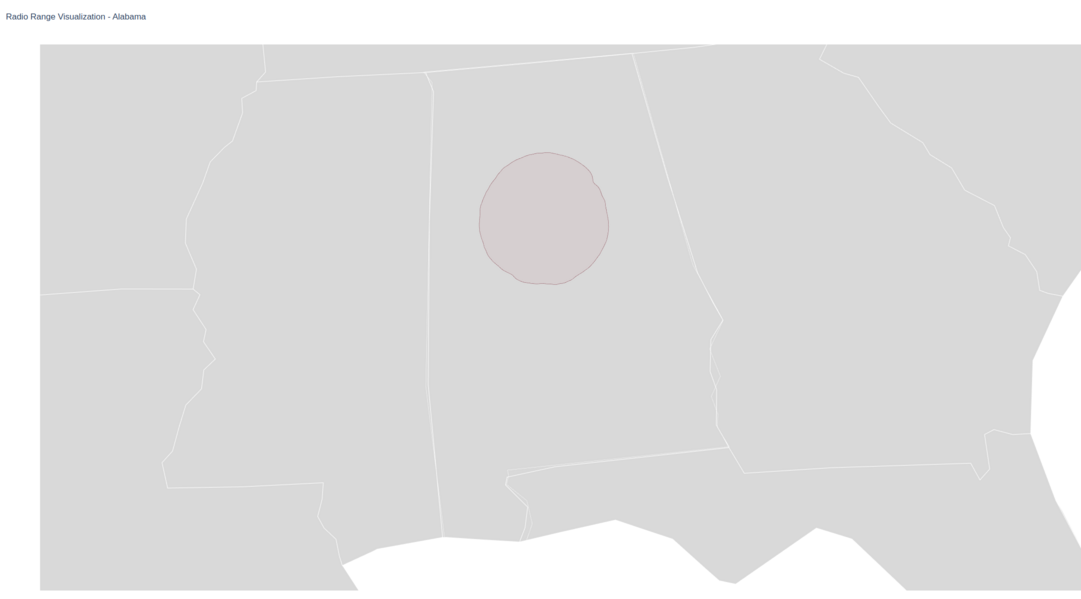

#### Highlight the one station on the radio map:

In [1]:
import plotly.graph_objects as go
from shapely.geometry import Point, Polygon
fig = go.Figure()

# Set the fill color to the default color
fill_color = "rgba(158,27,50,0.05)"

def plot_trace(lat_data, lon_data, fig):
    fig.add_trace(go.Scattergeo(
        # Sets the coordinates via the lat and lon data
        locationmode='USA-states',
        lon=lon_data,
        lat=lat_data,
        # Sets the mode to lines and fills in the area
        mode='lines',
        fill='toself',
        # Fill color set to the fill color variable
        fillcolor=fill_color,
        line=dict(width=0.5, color="rgba(119,36,50,0.8)"),
        hoverinfo='skip'
    ))

# Define the polygon for Alabama
polygon_points = [
    (35.0041, -88.1955), (34.9918, -85.6068), (32.8404, -85.1756),
    (32.2593, -84.8927), (31.9906, -85.091), (31.7091, -85.0026),
    (31.5200, -85.1358), (31.3384, -85.0836), (31.2093, -85.107),
    (31.0023, -84.9944), (30.9953, -87.6009), (30.9423, -87.5926),
    (30.8539, -87.6256), (30.6745, -87.4072), (30.4404, -87.3688),
    (30.1463, -87.5240), (30.1546, -88.3864), (31.8939, -88.4743),
    (34.8938, -88.1021), (35.0041, -88.1955)
]
alabama_polygon = Polygon(polygon_points)

# Read the data from the file
with open("FM_service_contour_current.txt", "r") as f:
    f.readline()
    for line in f:
        x_data = []
        y_data = []
        # Get the lms application ID
        lms_application_id = str(line.split("|")[2].strip())
        # Split the line by the pipe character and get the data
        data = line.split("|")[4:-2]
        # Get the latitude and longitude data and convert it to floats
        lat_data, lon_data = zip(*[(float(data_point.split(",")[0]), float(data_point.split(",")[-1])) for data_point in data])
        # Check if the first point (which is the center point) is in the Alabama polygon
        point = Point(lat_data[0], lon_data[0])
        # If it is not in the polygon, skip the point
        if not alabama_polygon.contains(point):
            continue
        # Iterate through the lat and lon data and append it to the x and y data lists
        for lat, lon in zip(lat_data[1:], lon_data[1:]):
            x_data.append(lat)
            y_data.append(lon)
        # Check the lms application ID and set the fill color accordingly
        if lms_application_id == "f4bd9f4326e443c99eb2c1b6063ebeb7":
            fill_color = "rgba(0,0,255,0.5)"
        else:
            fill_color = "rgba(158,27,50,0.05)"
        # Plot the trace
        plot_trace(x_data, y_data, fig)
        # Append None to the x and y data lists to separate the polygons
        x_data.append(None)
        y_data.append(None)

# Plot the Alabama polygon to help visualize the borders of the state
lat_data, lon_data = zip(*polygon_points)
fig.add_trace(go.Scattergeo(
    locationmode='USA-states',
    lon=lon_data,
    lat=lat_data,
    mode='lines',
    line=dict(width=0.5, color="rgba(255,255,255,1)"),
    hoverinfo='skip'
))

# Set the layout of the plot
fig.update_layout(
    title_text='Radio Range Visualization - Alabama',
    showlegend=False,
    geo=dict(
        scope='usa',
        landcolor='rgb(217, 217, 217)',
        projection_type='albers usa',
        center=dict(lat=32.456671, lon=-86.791130),  # Centered on Alabama
        projection_scale=5,
    )
)

# Save to HTML
fig.write_html("radio_range_visualization_alabama.html")

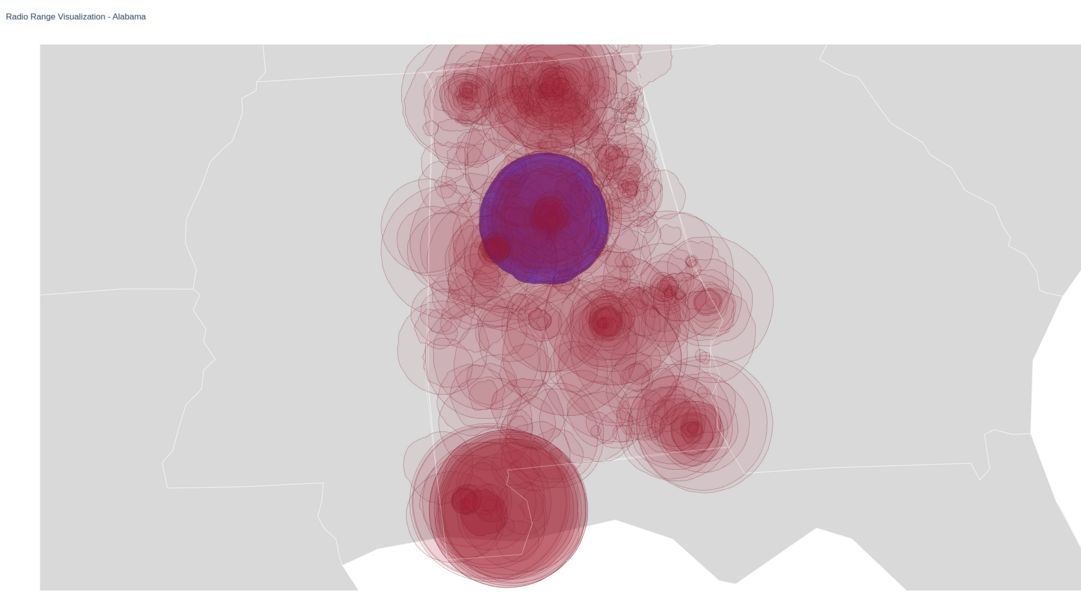